In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('bank.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
import matplotlib.pyplot as plt

# Categorical Variables

In [10]:
def bar_plot(variable):
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

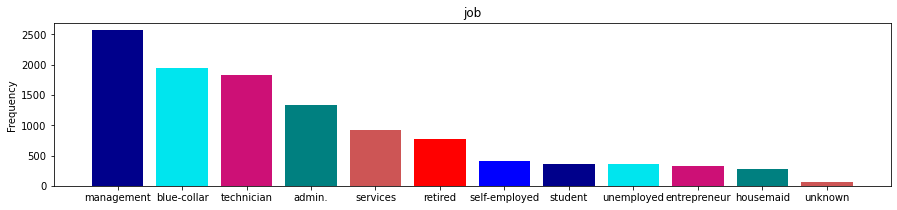

job: 
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


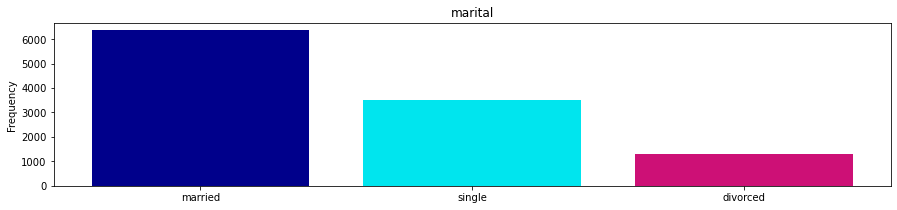

marital: 
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


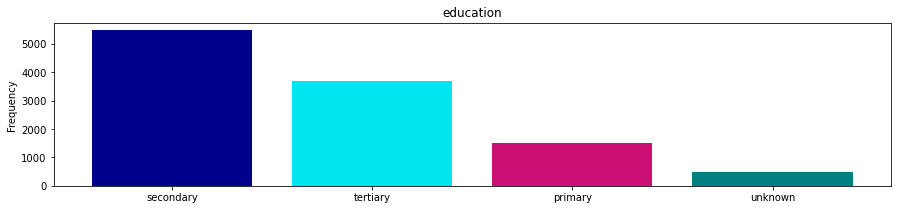

education: 
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


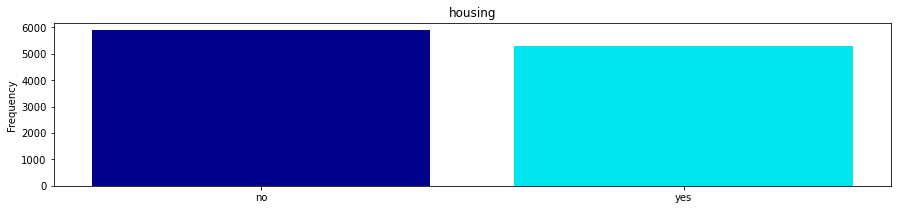

housing: 
 no     5881
yes    5281
Name: housing, dtype: int64


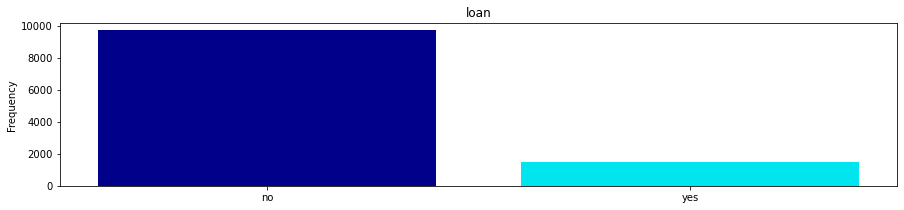

loan: 
 no     9702
yes    1460
Name: loan, dtype: int64


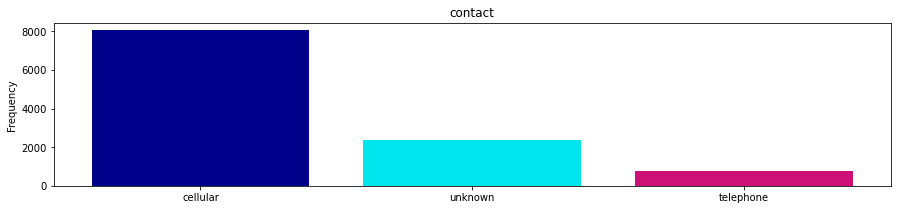

contact: 
 cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


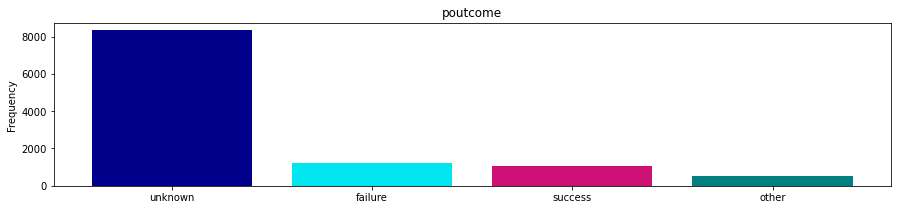

poutcome: 
 unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


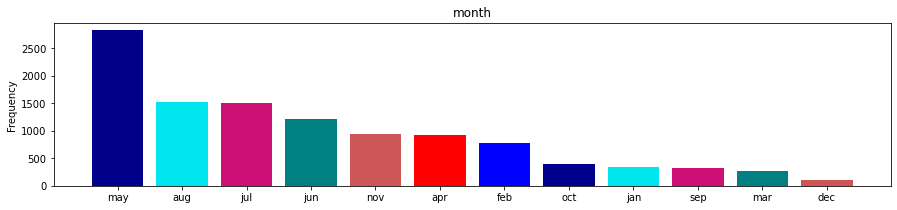

month: 
 may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


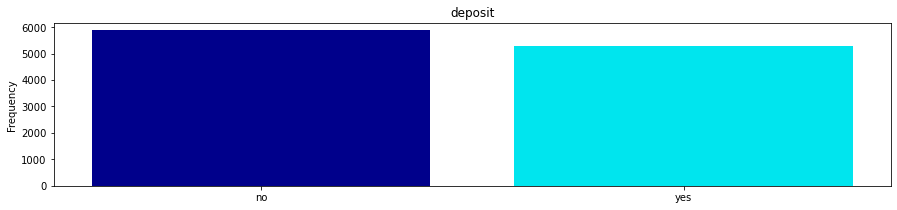

deposit: 
 no     5873
yes    5289
Name: deposit, dtype: int64


In [11]:
categoryc = ["job","marital","education", "housing", "loan","contact","poutcome","month","deposit"]
for c in categoryc:
    bar_plot(c)

In [ ]:
Numerical Variable

In [12]:
def plot_hist(variable):
    plt.figure(figsize=(9,6))
    plt.hist(data[variable], bins=40,color='#cd1076')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

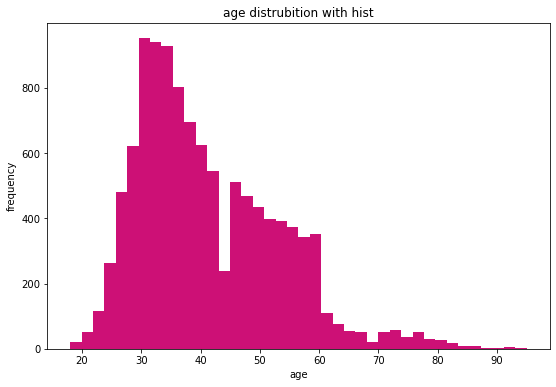

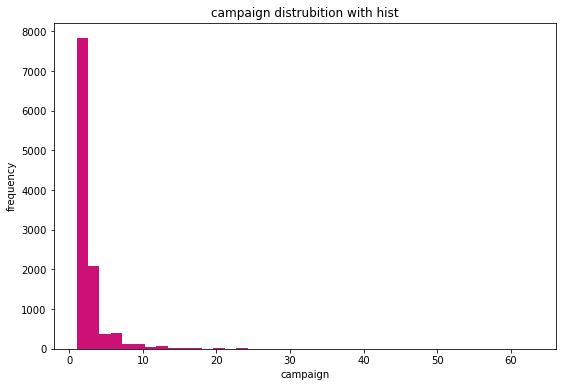

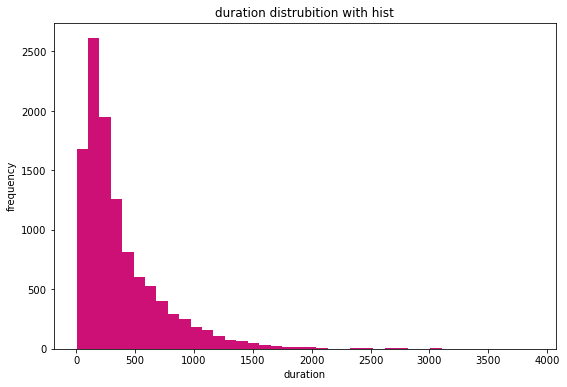

In [13]:
numericVar = ["age","campaign","duration"]
for n in numericVar:
    plot_hist(n)

# Outliers

In [14]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [15]:
data.loc[detect_outliers(data,['age',
                               'day','duration','campaign','previous'])]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3945,84,retired,married,tertiary,no,4761,no,no,telephone,9,sep,1405,1,92,3,failure,yes


In [16]:
data = data.drop([3945], axis=0)

# Missing Values

In [17]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [21]:
pip install seaborn 


     |████████████████████████████████| 292 kB 4.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import seaborn as sns

<AxesSubplot:>

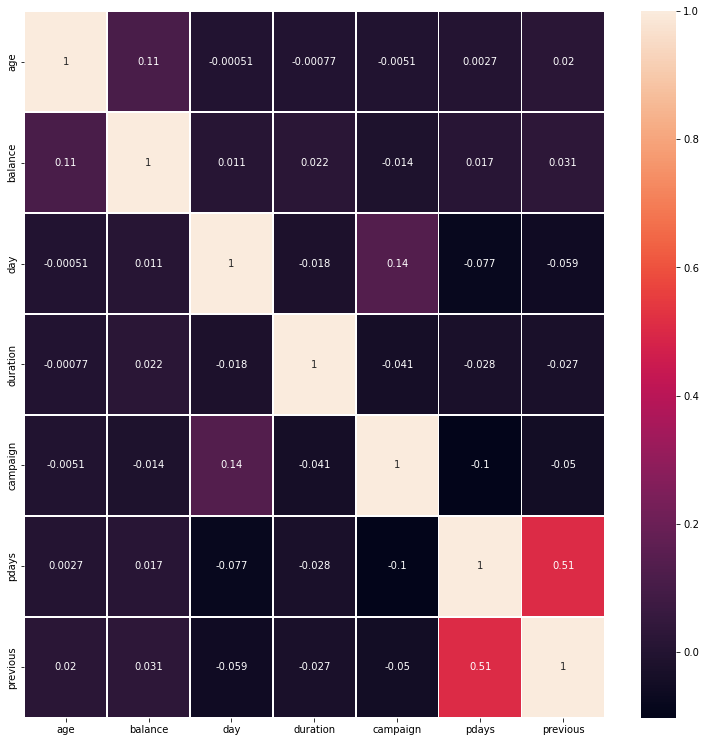

In [24]:
fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [25]:
data=data.drop(['duration'],axis=1)

In [26]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


# Onehot encoding

In [27]:
columns=data.select_dtypes(include=[object]).columns
data=pd.concat([data,pd.get_dummies(data[columns])],axis=1)
data=data.drop(['job','marital','education','default','housing','loan','contact','month','day','poutcome'],axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 0 to 11161
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  11161 non-null  int64 
 1   balance              11161 non-null  int64 
 2   campaign             11161 non-null  int64 
 3   pdays                11161 non-null  int64 
 4   previous             11161 non-null  int64 
 5   deposit              11161 non-null  object
 6   job_admin.           11161 non-null  uint8 
 7   job_blue-collar      11161 non-null  uint8 
 8   job_entrepreneur     11161 non-null  uint8 
 9   job_housemaid        11161 non-null  uint8 
 10  job_management       11161 non-null  uint8 
 11  job_retired          11161 non-null  uint8 
 12  job_self-employed    11161 non-null  uint8 
 13  job_services         11161 non-null  uint8 
 14  job_student          11161 non-null  uint8 
 15  job_technician       11161 non-null  uint8 
 16  job_

,age,balance,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,2,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [28]:
data.head()

,age,balance,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit_no,deposit_yes
0,59,2343,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,1,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,1,-1,0,yes,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,2,-1,0,yes,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [29]:
def pdayswork(pdays):
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)
data['pdays2'] = data['pdays'].apply(pdayswork)

In [30]:
data=data.drop(['deposit_no', 'deposit_yes'],axis=1)


In [31]:
def deposit1(deposit):
    if(deposit=='yes'):
        return(1)
    elif(deposit=='no'):
        return(0)
data['depositNew'] = data['deposit'].apply(deposit1)

In [32]:
data=data.drop(['deposit'],axis=1)

In [33]:
data.head()

,age,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays2,depositNew
0,59,2343,1,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45,1,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270,1,-1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476,1,-1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184,2,-1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


# Standard scaler

In [34]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, 0:50]
Y = data.iloc[:, 50]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(X)

[[ 1.4926218   0.25261499 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 [ 1.24065834 -0.4598839  -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 [-0.01915895 -0.08007052 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]
 ...
 [-0.77504932 -0.46484473 -0.18682923 ... -0.32579855  0.58352347
  -0.58379938]
 [ 0.14881669 -0.47383623 -0.18682923 ... -0.32579855 -1.71372713
   1.71291719]
 [-0.60707368 -0.47383623 -0.55420079 ... -0.32579855  0.58352347
  -0.58379938]]


# Modelling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
X = data.iloc[:, 0:50]
Y = data.iloc[:, 50]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=101,multi_class='ovr',solver='liblinear',class_weight='balanced',C=0.2)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

In [39]:
acc = accuracy_score(y_test,prediction)*100
acc

70.71204657411553

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf = RandomForestClassifier(n_estimators=100, max_depth=12,
                             random_state=50)

clf.fit(X_train,y_train)

prediction = clf.predict(X_test)

In [42]:
acc = accuracy_score(y_test,prediction)*100
acc

72.05553067622034

# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb=GaussianNB()
nb.fit(X_train,y_train)
naiveb=nb.predict(X_test)
prediction= nb.predict(X_test)

In [45]:
acc = accuracy_score(y_test,prediction)*100
acc

68.3833407971339

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn= KNeighborsClassifier(n_neighbors = 4,algorithm='ball_tree')
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)

In [48]:
acc = accuracy_score(y_test,prediction)*100
acc

61.12852664576802

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100,min_samples_leaf=10)
dtree.fit(X_train, y_train)
prediction=dtree.predict(X_test)

In [51]:
acc = accuracy_score(y_test,prediction)*100
acc

70.53291536050156